In [56]:
# import library yang dibutuhkan
import cv2 # untuk memproses citra
import matplotlib.pyplot as plt # memproses citra
import numpy as np # membantu perhingan angka khususnya matriks

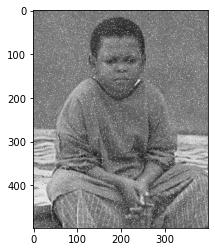

In [57]:
image = cv2.imread("modul5.jpeg") # baris code ini digunakan untuk membaca image yang tersimpan dan menyimpannya dalam variabel image
grayImage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # baris code untuk merubah gambar dari RGB ke grayscale dan menyimpannya dalam variabel grayImage
plt.imshow(grayImage,"gray") # baris code untuk menampilkan citra yang tersimpan dalam variabel grayImage

In [58]:
# fungsi berikut merupakan function untuk melakukan smothing pada image dengan mean filter
def mean(image,kernel_size): # deklarasi nama function dan parameter input-an yang dibutuhkan
    pdImage=np.pad(image,int(kernel_size/2)) # baris code untuk membuat sebuah image dengan padding tertentu, agar mempermudah proses filter
                                             # agar setiap pixel dapat terjangkau
    Image_baru=np.zeros(image.shape) # membuat sebuah matriks numpy array dengan elemen nol yang ukurannya sama dengan ukuran image yang akan di smothing
    y,x=Image_baru.shape # mengambil dan menyimpan ukuran dari image
    for i in range (y): #perulangan sebanyak y
        for j in range (x): #perulangan sebanyak x
            for k in range (kernel_size): #perulangan sebanyak ukuran window
                for l in range (kernel_size): #perulangan sebanyak ukuran window
                    Image_baru[i][j] +=pdImage[i+k][j+l] # melakukan penjumlahan untuk setiap elemen yang dijangkau filter dan menyimpannya dalam matrik citra
    Image_baru=Image_baru/(kernel_size**2) # melakukan pembagian dengan ukuran filter untuk mendapatkan mean/rata-rata
                
    return Image_baru # mengembalikan nilai Image_baru (output) 

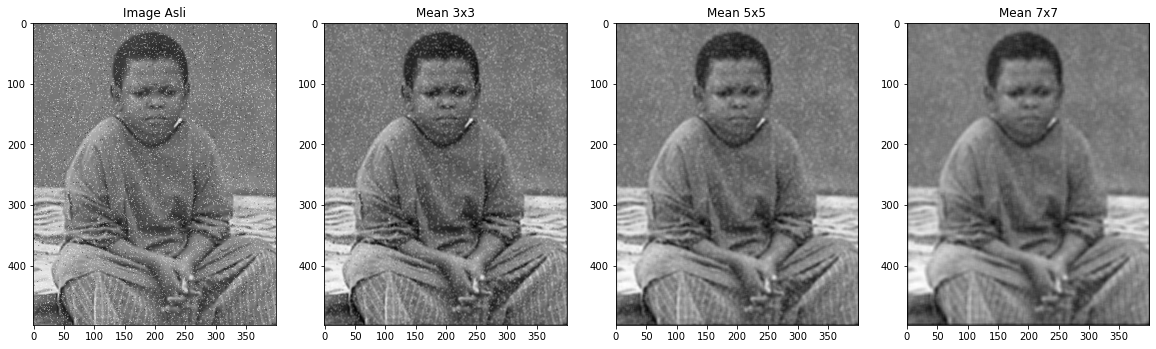

In [59]:
# menampilkan gambar dengan mean filter dengan ukuran window berbeda-beda
plt.figure(figsize=(20,30)) # berfungsi untuk mengatur ukuran image yang akan ditampilkan
plt.subplot(141) # mengatur posisi image pada plt utama
plt.title("Image Asli") # memberikan judul 
plt.imshow(grayImage,"gray") # menampilkan grayImage
plt.subplot(142) # mengatur posisi image pada plt utama
plt.title("Mean 3x3") # memberikan judul 
plt.imshow(mean(grayImage,3),"gray") # menampilkan  hasil smothing terhadap grayImage dengan mean filtering dan ukuran window 3x3
plt.subplot(143)
plt.title("Mean 5x5")
plt.imshow(mean(grayImage,5),"gray") # menampilkan  hasil smothing terhadap grayImage dengan mean filtering dan ukuran window 5x5
plt.subplot(144)
plt.title("Mean 7x7")
plt.imshow(mean(grayImage,7),"gray") # menampilkan  hasil smothing terhadap grayImage dengan mean filtering dan ukuran window 7x7

In [60]:
# function yang berfugsi untuk mencari nilai median dari sebuah data pada matriks
def med(matriks): #deklarasi nama function dan parameter input yang dibutuhkan
    med=0
    # dalam perulangan berikut akan dilakukan pengurutan data dari data terkecil ke terbesar dengan algoritma insertion sort
    for i in range (len(matriks)): # perulangan sebanyak data pada matriks
        k=i # menyimpan nilai ke dalam variabel k berfungsi untuk menandai data yang di select
        for j in range(i+1): # perulangan sebanyak i+1 untuk menggeser data ke kiri sampai menemukan posisi yang sesuai
            # statement control untuk menyisipkan data yang di select pada posisi yang sesuai
            # jika data belum pada tempatnya maka data akan terus bergeser ke kiri
            if matriks[k]<matriks[k-1]:
                tukar=matriks[k]
                matriks[k]=matriks[k-1]
                matriks[k-1]=tukar
            # jika data sudah menemukan posisinya maka  perulangan untuk menggeser posisi berhenti (break)
            else:
                break
            k-=1
    # statement untuk menentukan nilai median
    # jika banyak datanya genap (banyak data habis dibagi 2) maka mediannya adalah rata-rata dari dua data yang tengah
    if len(matriks)%2==0:
        med= ( matriks[int(len(matriks)/2)] +  matriks[int(len(matriks)/2)-1] )/2
    # jika banyak datanya ganjil maka pasti terdapat satu data tengah yang yaitu data ke( (banyak data+1)/2 )
    else:
        med= matriks[int(len(matriks)/2)]
    return med
      

In [67]:
# fungsi berikut merupakan function untuk melakukan smothing pada image dengan median filter
def median(image,kernel_size): #deklarasi nama function dan parameter input yang dibutuhkan
    pdImage=np.pad(image,int(kernel_size/2)) # baris code untuk membuat sebuah image dengan padding tertentu, agar mempermudah proses filter
                                             # agar setiap pixel dapat terjangkau
    Image_baru=np.zeros(image.shape) # (wadah) membuat sebuah matriks numpy array dengan elemen nol yang ukurannya sama dengan ukuran image yang akan di smothing
    y,x=Image_baru.shape # mengambil dan menyimpan ukuran dari image
    for i in range (y): #perulangan sebanyak y
        for j in range (x): #perulangan sebanyak x
            median=[] # membuat sebuah list untuk menyimpan data yang dijangkau sesuai ukuran window untuk setiap iterasi untuk ditentukan mediannya
            for k in range (kernel_size): #perulangan sebanyak ukuran window
                for l in range (kernel_size): #perulangan sebanyak ukuran window
                    median.append(pdImage[i+k][j+l]) # menambahkan pixel yang dijangkau ke dalam list median
            Image_baru[i][j]=med(median) # mencari median dari list sebelumnya dan menyimpannya dalam wadah yang sudah disiapkan sebagai hasil smothing
    return Image_baru # mengembalikan nilai IMage_baru

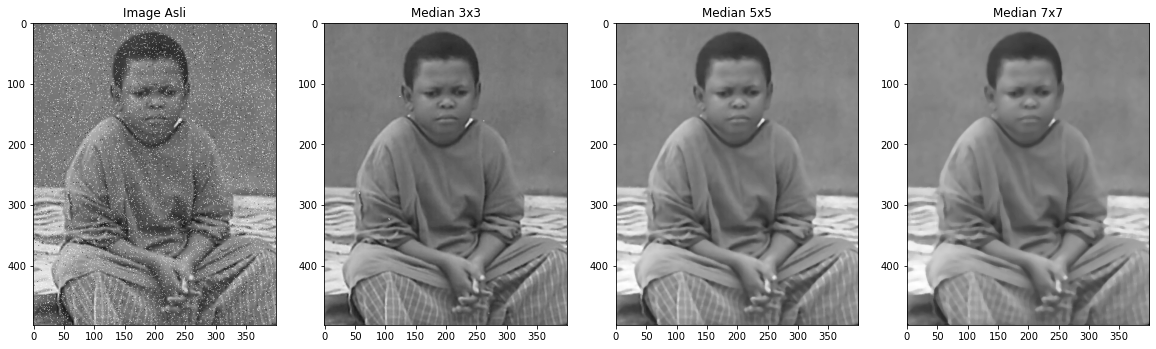

In [68]:
# menampilkan gambar dengan median filter dengan ukuran window berbeda-beda
plt.figure(figsize=(20,30)) # berfungsi untuk mengatur ukuran image yang akan ditampilkan
plt.subplot(141) # mengatur posisi image pada plt utama
plt.title("Image Asli") # memberikan judul 
plt.imshow(grayImage,"gray") # menampilkan grayImage
plt.subplot(142)
plt.title("Median 3x3")
plt.imshow(median(grayImage,3),"gray") # menampilkan  hasil smothing terhadap grayImage dengan median filter dan ukuran window 3x3
plt.subplot(143)
plt.title("Median 5x5")
plt.imshow(median(grayImage,5),"gray") # menampilkan  hasil smothing terhadap grayImage dengan median filter dan ukuran window 5x5
plt.subplot(144)
plt.title("Median 7x7")
plt.imshow(median(grayImage,7),"gray") # menampilkan  hasil smothing terhadap grayImage dengan median filter dan ukuran window 7x7

In [93]:
# fungsi untuk mencari modus dari sebuah list
def mod(matriks):
    mod=np.zeros(len(matriks)).astype(int) # membuat sebuah numpy array kosong sebagai wadah untuk menyimpan banyaknya kemunculan tiap elemen pada list
    for i in range (len(matriks)): # perulangan sepanjang ukuran matriks atau list yang akan di cari modusnya
        k=0 # varabel k berfungsi untuk menghitung banyaknya kemunculan tiap elemen
        for j in range (len(matriks)): # perulangan sepanjang ukuran matriks atau list yang akan di cari modusnya 
            if matriks[i]==matriks[j]: # sebuah kontrol jika ditemukan data yang sama maka k akan bertambah 1 (sesuai fungsi nya menghitung kemunculan)
                k+=1
        mod[i]=k # menyimpan banyaknya kemunculan elemen
    indeks=0 # berfungsi untuk menyimpan indeks dari data yang merupakan modus pada iterasi dibawah
    for i in range(len(mod)): # perulangan sebanyak ukuran mod
        if mod[i]==max(mod): # mengecek apakah kemunculan pada indeks tersebut memiliki kemunculan terbanyak
                # jika benar maka modus ditemukan dan perulangan di hentikan(break)
            indeks=i
            break
            
    return matriks[indeks]  # mengembalikan nilai modus (output)

In [99]:
# fungsi berikut merupakan function untuk melakukan smothing pada image dengan modus filter
def modus(image,kernel_size): #deklarasi nama function dan parameter input yang dibutuhkan
    pdImage=np.pad(image,int(kernel_size/2)) # baris code untuk membuat sebuah image dengan padding tertentu, agar mempermudah proses filter
                                             # agar setiap pixel dapat terjangkau
    Image_baru=np.zeros(image.shape) # (wadah) membuat sebuah matriks numpy array dengan elemen nol yang ukurannya sama dengan ukuran image yang akan di smothing
    y,x=Image_baru.shape # mengambil dan menyimpan ukuran dari image
    for i in range (y): #perulangan sebanyak y
        for j in range (x): #perulangan sebanyak x
            modus=[]  # membuat sebuah list untuk menyimpan data yang dijangkau sesuai ukuran window untuk setiap iterasi untuk ditentukan modus nya
            for k in range (kernel_size): #perulangan sebanyak ukuran window
                for l in range (kernel_size): #perulangan sebanyak window
                    modus.append(pdImage[i+k][j+l]) # menambahkan pixel yang dijangkau ke dalam list modus
            Image_baru[i][j]=mod(modus) # mencari modus dari list sebelumnya dan menyimpannya dalam wadah yang sudah disiapkan sebagai hasil
    return Image_baru # mengembalikan nilai Image_baru

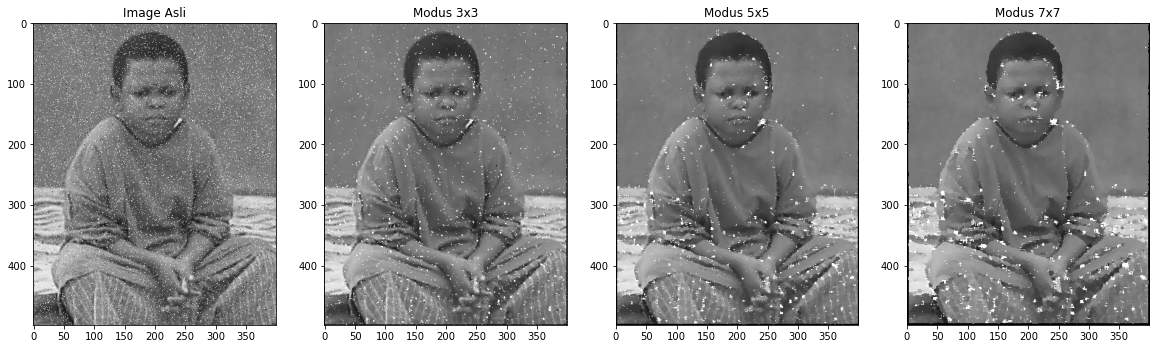

In [100]:
# menampilkan gambar dengan median filter dengan ukuran window berbeda-beda
plt.figure(figsize=(20,30)) # berfungsi untuk mengatur ukuran image yang akan ditampilkan
plt.subplot(141) # mengatur posisi image pada plt utama
plt.title("Image Asli") # memberikan judul 
plt.imshow(grayImage,"gray") # menampilkan grayImage
plt.subplot(142)
plt.title("Modus 3x3")
plt.imshow(modus(grayImage,3),"gray")# menampilkan  hasil smothing terhadap grayImage dengan modus filter dan ukuran window 3x3
plt.subplot(143)
plt.title("Modus 5x5")
plt.imshow(modus(grayImage,5),"gray")# menampilkan  hasil smothing terhadap grayImage dengan modus filter dan ukuran window 5x5
plt.subplot(144)
plt.title("Modus 7x7")
plt.imshow(modus(grayImage,7),"gray")# menampilkan  hasil smothing terhadap grayImage dengan modus filter dan ukuran window 7x7